In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
data_finger = pd.read_csv('Data/2018-01-30_Finger.csv')
data_ear1 = pd.read_csv('Data/2018-01-30_Ear_1.csv')
data_ear2 = pd.read_csv('Data/2018-01-30_Ear_2.csv')

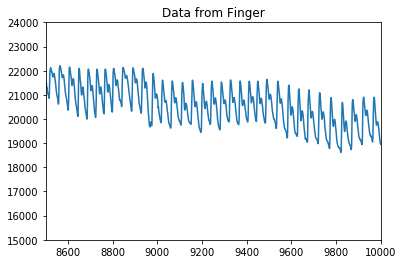

In [3]:
plt.title('Data from Finger') #the title of our heart rate plot
plt.ylim(15000, 24000)
plt.xlim([8500, 10000])
plt.plot(data_finger.Red_Signal) #draw the plot object
plt.show() #display the plot object

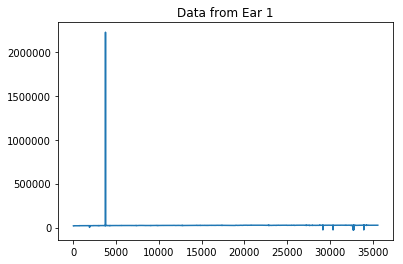

In [4]:
plt.title('Data from Ear 1') #the title of our heart rate plot
#plt.ylim(20000, 26000)
#plt.xlim(12200, 12400)
plt.plot(data_ear1.Red_Signal) #draw the plot object
plt.show() #display the plot object

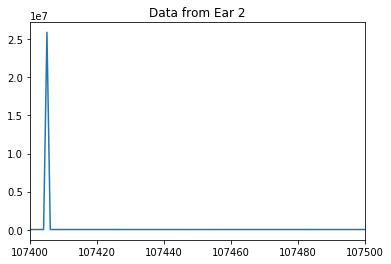

In [5]:
plt.title('Data from Ear 2') #the title of our heart rate plot
#plt.ylim(20000, 26000)
plt.xlim(107400, 107500)
plt.plot(data_ear2.Red_Signal) #draw the plot object
plt.show() #display the plot object

In [6]:
import ECGanalyser

In [7]:
ECG = ECGanalyser.ECGanalyser('Data/2018-01-30_Finger.csv')

In [8]:
data = ECG.load_data()

In [9]:
data = ECG.remove_dc_offset('Red_Signal',1,100)

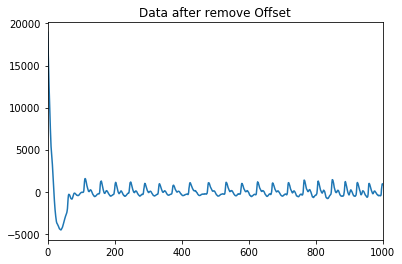

In [10]:
plt.title('Data after remove Offset') #the title of our heart rate plot
#plt.ylim(20000, 30000)
plt.xlim([0, 1000])
plt.plot(data.Red_Signal) #draw the plot object


plt.show() #display the plot object

Python peaks detection: https://blog.ytotech.com/2015/11/01/findpeaks-in-python/

In [11]:
data = ECG.calculate_rolling_mean('Red_Signal', 0.7, 100)
#dataset = data[100:1000].reset_index(drop=True) # Create new sample for peak detection
dataset = data
print(dataset)

          Date Patient_ID    Red_Signal  Red_Signal_rollingmean
0      37:46.6         Vu  18955.817101                0.160709
1      37:46.6         Vu  17250.484459                0.160709
2      37:46.6         Vu  15641.221968                0.160709
3      37:46.6         Vu  14103.941878                0.160709
4      37:46.6         Vu  12649.811489                0.160709
5      37:46.6         Vu  11266.733911                0.160709
6      37:46.6         Vu   9920.415254                0.160709
7      37:46.6         Vu   8670.210140                0.160709
8      37:46.6         Vu   7444.756260                0.160709
9      37:46.7         Vu   6338.408016                0.160709
10     37:46.7         Vu   5379.654740                0.160709
11     37:46.7         Vu   4776.705511                0.160709
12     37:46.7         Vu   4151.491971                0.160709
13     37:46.7         Vu   3764.623244                0.160709
14     37:46.7         Vu   3227.113922 

C:\Users\Vu\Canaria\DataAnalysis\ECGanalyser.py:28: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=70,center=False).mean()
  mov_avg = pd.rolling_mean(self.data[column], window=int(hrw*fs)) #calculate the moving average


Average Heart Beat is: 125.0


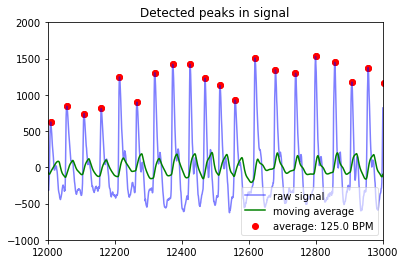

In [12]:
hrw = 0.5 #1-sided window size, as proportion of the sampling frequency
samplingfreq = 100 #the example dataset was sampled at 100hz
peak_threadhold = 500
mov_avg = dataset['Red_Signal_rollingmean']
#mark regions of interest
window = []
peaklist = []
ypeak = []
listpos = 0 #use a counter to move between different data columns
for datapoint in dataset.Red_Signal:
    rollingmean = dataset.Red_Signal_rollingmean[listpos] #get the moving average
    if (datapoint <= rollingmean and len(window) < 1): #if there is no R-complex activity
        listpos += 1
        
    elif (datapoint > rollingmean): #if datapoint is above moving average, mark ROI
        window.append(datapoint)
        listpos += 1
    
    else: #if signal drops below local mean, determine highest point
        maximum = max(window)
        beatposition = listpos - len(window) + (window.index(max(window))) #note the point's x-coordinate
        if dataset.Red_Signal[beatposition] > peak_threadhold:
            peaklist.append(beatposition) #add detected peak to list
            ypeak.append(dataset.Red_Signal[beatposition])
#         peaklist.append(beatposition)
        window = [] #clear marked ROI
        listpos += 1
        
#ybeat = [dataset.Red_Signal[x] for x in peaklist] #get the y-value of all peaks for plotting purposes
# for x in peaklist:
#     if dataset.Red_Signal[x] < peak_threadhold:
#         peaklist.remove(x)
#     else:
#         ypeak.append(dataset.Red_Signal[x])
        
#print(len(peaklist))
#print(beatposition)

RR_list = []
count = 0
while(count < (len(peaklist)-1)):
    RR_interval = (peaklist[count+1] - peaklist[count]) #calculate distance between each peak in sample
    ms_dist = ((RR_interval/samplingfreq) * 1000.0) #convert sample distances to ms distances
    RR_list.append(ms_dist) #append to ms distances list
    count += 1
    
bpm = 60000 / np.mean(RR_list) #60000ms (1 minute) / average R-R interval of signal
print("Average Heart Beat is: %.01f" %bpm) #round off to 1sf and print

plt.title('Detected peaks in signal')
plt.ylim(-1000, 2000)
plt.xlim(12000, 13000)
plt.plot(dataset.Red_Signal, alpha = 0.5, color = 'blue', label = "raw signal") #plot semi-transparent heart rate
plt.plot(mov_avg, color = 'green', label = "moving average") #plot the moving average
plt.scatter(peaklist, ypeak, color = 'red', label = "average: %.1f BPM" %bpm) #plot the peaks
plt.legend(loc = 4, framealpha = 0.6)
plt.scatter(peaklist, ypeak, color = 'red')
plt.show()

Heart rate, also known as pulse, is the number of times a person's heart beats per minute. Normal heart rate varies from person to person, but a normal range for adults is 60 to 100 beats per minute, according to the Mayo Clinic.

In [13]:
# Implement Object Oriented
a, b = ECG.peak_detect('Red_Signal', 500)

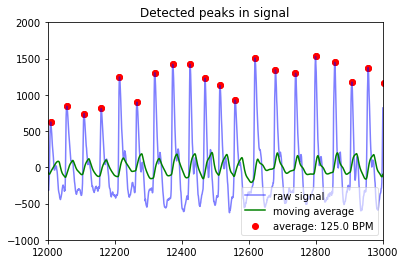

In [14]:
plt.title('Detected peaks in signal')
plt.ylim(-1000, 2000)
plt.xlim(12000, 13000)
plt.plot(dataset.Red_Signal, alpha = 0.5, color = 'blue', label = "raw signal") #plot semi-transparent heart rate
plt.plot(mov_avg, color = 'green', label = "moving average") #plot the moving average
plt.scatter(a, b, color = 'red', label = "average: %.1f BPM" %bpm) #plot the peaks
plt.legend(loc = 4, framealpha = 0.6)
plt.scatter(peaklist, ypeak, color = 'red')
plt.show()

In [15]:
RR_list = ECG.calculate_RR(50)
bpm = ECG.calculate_bpm(50)

In [16]:
RR_diff = []
RR_sqdiff = []
cnt = 1 #Use counter to iterate over RR_list
while (cnt < (len(RR_list)-1)): #Keep going as long as there are R-R intervals 
    RR_diff.append(abs(RR_list[cnt] - RR_list[cnt+1])) #Calculate absolute difference between successive R-R interval
    RR_sqdiff.append(math.pow(RR_list[cnt] - RR_list[cnt+1], 2)) #Calculate squared difference
    cnt += 1

print(RR_diff, RR_sqdiff)

[100.0, 40.0, 60.0, 40.0, 40.0, 140.0, 120.0, 40.0, 120.0, 0.0, 40.0, 40.0, 0.0, 100.0, 0.0, 60.0, 60.0, 20.0, 100.0, 280.0, 100.0, 40.0, 60.0, 40.0, 100.0, 20.0, 80.0, 20.0, 80.0, 20.0, 80.0, 40.0, 20.0, 0.0, 40.0, 100.0, 40.0, 60.0, 40.0, 60.0, 0.0, 40.0, 60.0, 40.0, 20.0, 60.0, 40.0, 40.0, 0.0, 20.0, 120.0, 0.0, 60.0, 20.0, 100.0, 20.0, 20.0, 60.0, 20.0, 60.0, 0.0, 100.0, 20.0, 60.0, 0.0, 40.0, 20.0, 100.0, 20.0, 180.0, 140.0, 140.0, 60.0, 120.0, 80.0, 100.0, 60.0, 20.0, 20.0, 60.0, 60.0, 40.0, 40.0, 20.0, 60.0, 40.0, 100.0, 140.0, 40.0, 100.0, 60.0, 20.0, 0.0, 20.0, 60.0, 80.0, 0.0, 120.0, 40.0, 80.0, 0.0, 120.0, 40.0, 100.0, 60.0, 60.0, 20.0, 20.0, 20.0, 40.0, 100.0, 60.0, 80.0, 60.0, 60.0, 20.0, 40.0, 80.0, 20.0, 60.0, 80.0, 20.0, 60.0, 40.0, 120.0, 60.0, 80.0, 20.0, 20.0, 120.0, 220.0, 60.0, 80.0, 0.0, 20.0, 20.0, 140.0, 160.0, 100.0, 120.0, 60.0, 80.0, 100.0, 60.0, 40.0, 160.0, 80.0, 80.0, 60.0, 20.0, 40.0, 60.0, 60.0, 80.0, 120.0, 0.0, 60.0, 100.0, 100.0, 0.0, 60.0, 80.0, 160.

In [18]:
ibi = np.mean(RR_list) #Take the mean of RR_list to get the mean Inter Beat Interval
print("IBI:", ibi)

sdnn = np.std(RR_list) #Take standard deviation of all R-R intervals
print("SDNN:", sdnn)

sdsd = np.std(RR_diff) #Take standard deviation of the differences between all subsequent R-R intervals
print("SDSD:", sdsd)

rmssd = np.sqrt(np.mean(RR_sqdiff)) #Take root of the mean of the list of squared differences
print("RMSSD:", rmssd)

NN20 = [x for x in RR_diff if (x>20)] #First create a list of all values over 20, 50
NN50 = [x for x in RR_diff if (x>50)]
pNN20 = float(len(NN20)) / float(len(RR_diff)) #Calculate the proportion of NN20, NN50 intervals to all intervals
pNN50 = float(len(NN50)) / float(len(RR_diff)) #Note the use of float(), because we don't want Python to think we want an int() and round the proportion to 0 or 1
print("pNN20, pNN50:", pNN20, pNN50)

IBI: 959.848484848
SDNN: 133.101985933
SDSD: 53.0409003744
RMSSD: 82.0795701595
pNN20, pNN50: 0.6928934010152284 0.49746192893401014


In [20]:
ECG.measures['RR_list']

[2240.0,
 960.0,
 860.0,
 900.0,
 840.0,
 880.0,
 840.0,
 980.0,
 1100.0,
 1060.0,
 940.0,
 940.0,
 900.0,
 940.0,
 940.0,
 840.0,
 840.0,
 780.0,
 720.0,
 700.0,
 800.0,
 1080.0,
 1180.0,
 1140.0,
 1080.0,
 1040.0,
 940.0,
 920.0,
 840.0,
 860.0,
 940.0,
 920.0,
 1000.0,
 960.0,
 980.0,
 980.0,
 940.0,
 840.0,
 800.0,
 860.0,
 900.0,
 960.0,
 960.0,
 920.0,
 860.0,
 900.0,
 880.0,
 820.0,
 780.0,
 740.0,
 740.0,
 720.0,
 840.0,
 840.0,
 900.0,
 880.0,
 980.0,
 960.0,
 940.0,
 880.0,
 900.0,
 840.0,
 840.0,
 940.0,
 960.0,
 1020.0,
 1020.0,
 980.0,
 960.0,
 860.0,
 880.0,
 1060.0,
 1200.0,
 1060.0,
 1000.0,
 880.0,
 960.0,
 1060.0,
 1000.0,
 1020.0,
 1040.0,
 980.0,
 1040.0,
 1000.0,
 960.0,
 980.0,
 1040.0,
 1000.0,
 900.0,
 1040.0,
 1080.0,
 980.0,
 920.0,
 900.0,
 900.0,
 920.0,
 980.0,
 1060.0,
 1060.0,
 940.0,
 900.0,
 980.0,
 980.0,
 1100.0,
 1060.0,
 960.0,
 1020.0,
 1080.0,
 1060.0,
 1040.0,
 1020.0,
 1060.0,
 960.0,
 1020.0,
 1100.0,
 1040.0,
 980.0,
 1000.0,
 1040.0,
 960.0,
